# Урок 2. Масштабирование признаков. L1 и L2 регуляризация. Стохастический градиентный спуск.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

**1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод.**

In [52]:
# Пространство признаков. Стаж, цена занятия и квалификация.
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

# Целевая переменная (средний балл ЕГЭ)
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [53]:
# Стандартизация вектора x
calc_std_fit = lambda x: (x - x.mean()) / x.std()

In [54]:
# mean square error
calc_mse = lambda y, y_pred: np.mean((y - y_pred)**2)

In [218]:
# Расчет модели методом градиентного спуска с использованием L2 регуляризации
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        W -= alpha * 2 * X @ (y_pred - y) / n + lambda_ * W
    return W

In [219]:
# Стандартизируем пространство признаков.
X_st = X.copy().astype(np.float64)

for i in range(1, X_st.shape[0]):
    X_st[i] = calc_std_fit(X_st[i])

In [220]:
# Посчитаем весовые коэффициенты для разных значений коэффициента регуляризации от 0 до 0.1.
lambda_arr = np.linspace(0, 0.1, 51)
w = np.array([eval_model_reg2(X_st, y, iterations=10000, alpha=1e-2, lambda_=lambda_) for lambda_ in lambda_arr])

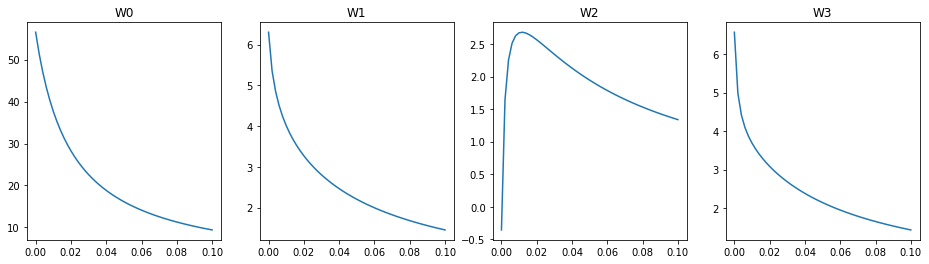

In [221]:
# Строим графики полученных весов.
w_size = w.shape[1]
fig, axs = plt.subplots(1, w_size, figsize=(16, 4))

for i in range(w_size):
    axs[i].plot(lambda_arr, w[:,i])
    axs[i].set_title(f'W{i}')
    
plt.show()

In [222]:
w

array([[56.5       ,  6.30309349, -0.35638885,  6.57147642],
       [51.36363636,  5.35442268,  1.64073412,  4.98073984],
       [47.08333333,  4.84882509,  2.25420333,  4.41525592],
       [43.46153846,  4.49977703,  2.51184045,  4.09347678],
       [40.35714286,  4.23111974,  2.6272452 ,  3.86661396],
       [37.66666667,  4.01145689,  2.67324854,  3.68757438],
       [35.3125    ,  3.82489516,  2.68143446,  3.53699411],
       [33.23529412,  3.66231654,  2.66762483,  3.40544158],
       [31.38888889,  3.5180158 ,  2.64054127,  3.28772316],
       [29.73684211,  3.38818437,  2.60532555,  3.18069467],
       [28.25      ,  3.27014808,  2.56516043,  3.08230288],
       [26.9047619 ,  3.16195154,  2.52208793,  2.99112182],
       [25.68181818,  3.06211667,  2.477453  ,  2.90611002],
       [24.56521739,  2.9694949 ,  2.43215795,  2.82647485],
       [23.54166667,  2.88317285,  2.38681527,  2.75159248],
       [22.6       ,  2.80240975,  2.34184281,  2.68095822],
       [21.73076923,  2.

Вывод: При увеличении коэффициента регуляризации $\lambda$ весовые коэффициенты модели уменьшаются.

**2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?**

Да, можно. Такая регуляризация называется elastic net. Данный тип регуляризации хорошо подходит для выборок в которых число признаков больше числа наблюдений.

**3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.**

In [206]:
a = np.array([1,2,3])

In [207]:
a**2

array([1, 4, 9])